# Visualizing Aviation Accidents in the US

Dataset provided by the [National Transportation Safety Board](https://www.ntsb.gov/Pages/default.aspx). You can download a copy [here](http://app.ntsb.gov/aviationquery/Download.ashx?type=csv).

US state naming data provided by [Dave Ross](https://statetable.com/).

US state shape data can be downloaded [here](https://github.com/matplotlib/basemap/tree/master/examples).

## Parsing the data with either Python's CSV module...

In [1]:
import csv

with open("AviationData.txt", "r", encoding="UTF8") as f:
    reader = csv.reader(f,delimiter="|") 
    d = [r for r in reader]
print(d[0:3])

[['Event Id ', ' Investigation Type ', ' Accident Number ', ' Event Date ', ' Location ', ' Country ', ' Latitude ', ' Longitude ', ' Airport Code ', ' Airport Name ', ' Injury Severity ', ' Aircraft Damage ', ' Aircraft Category ', ' Registration Number ', ' Make ', ' Model ', ' Amateur Built ', ' Number of Engines ', ' Engine Type ', ' FAR Description ', ' Schedule ', ' Purpose of Flight ', ' Air Carrier ', ' Total Fatal Injuries ', ' Total Serious Injuries ', ' Total Minor Injuries ', ' Total Uninjured ', ' Weather Condition ', ' Broad Phase of Flight ', ' Report Status ', ' Publication Date ', ' '], ['20170306X21712 ', ' Accident ', ' CEN17LA117 ', ' 03/04/2017 ', ' Paynesville, MN ', ' United States ', ' 45.370000 ', ' -94.756389 ', ' PEX ', ' PAYNESVILLE MUNI ', ' Non-Fatal ', ' Substantial ', ' Airplane ', ' N7524V ', ' JUDE MIKE C ', ' SIDE WINDER ', ' Yes ', '  ', '  ', ' Part 91: General Aviation ', '  ', ' Personal ', '  ', '  ', ' 1 ', '  ', '  ', ' VMC ', ' TAKEOFF ', ' Pr

## or Parsing the data via Python's string methods.

In [2]:
with open("AviationData.txt", "r", encoding="UTF8") as f:
    d = f.readlines()
    
d = [r.strip().split("|") for r in d]
print(d[0:3])

[['Event Id ', ' Investigation Type ', ' Accident Number ', ' Event Date ', ' Location ', ' Country ', ' Latitude ', ' Longitude ', ' Airport Code ', ' Airport Name ', ' Injury Severity ', ' Aircraft Damage ', ' Aircraft Category ', ' Registration Number ', ' Make ', ' Model ', ' Amateur Built ', ' Number of Engines ', ' Engine Type ', ' FAR Description ', ' Schedule ', ' Purpose of Flight ', ' Air Carrier ', ' Total Fatal Injuries ', ' Total Serious Injuries ', ' Total Minor Injuries ', ' Total Uninjured ', ' Weather Condition ', ' Broad Phase of Flight ', ' Report Status ', ' Publication Date ', ''], ['20170306X21712 ', ' Accident ', ' CEN17LA117 ', ' 03/04/2017 ', ' Paynesville, MN ', ' United States ', ' 45.370000 ', ' -94.756389 ', ' PEX ', ' PAYNESVILLE MUNI ', ' Non-Fatal ', ' Substantial ', ' Airplane ', ' N7524V ', ' JUDE MIKE C ', ' SIDE WINDER ', ' Yes ', '  ', '  ', ' Part 91: General Aviation ', '  ', ' Personal ', '  ', '  ', ' 1 ', '  ', '  ', ' VMC ', ' TAKEOFF ', ' Pre

## Cleaning up the values in our data

In [3]:
#Values in our data are padded with whitespaces, remove them before proceeding with analysis
data = []
for row in d:
    r = [item.strip() for item in row]
    data.append(r)
print(data[0:3])

[['Event Id', 'Investigation Type', 'Accident Number', 'Event Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code', 'Airport Name', 'Injury Severity', 'Aircraft Damage', 'Aircraft Category', 'Registration Number', 'Make', 'Model', 'Amateur Built', 'Number of Engines', 'Engine Type', 'FAR Description', 'Schedule', 'Purpose of Flight', 'Air Carrier', 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured', 'Weather Condition', 'Broad Phase of Flight', 'Report Status', 'Publication Date', ''], ['20170306X21712', 'Accident', 'CEN17LA117', '03/04/2017', 'Paynesville, MN', 'United States', '45.370000', '-94.756389', 'PEX', 'PAYNESVILLE MUNI', 'Non-Fatal', 'Substantial', 'Airplane', 'N7524V', 'JUDE MIKE C', 'SIDE WINDER', 'Yes', '', '', 'Part 91: General Aviation', '', 'Personal', '', '', '1', '', '', 'VMC', 'TAKEOFF', 'Preliminary', '03/08/2017', ''], ['20170302X20302', 'Accident', 'WPR17LA072', '03/01/2017', 'Carson City, NV', 'United Sta

## Searching for rows that contain specific value:

In [4]:
search = "LAX94LA336"

### 1. Time Complexity O(n*m)

#### a) Using 2 for-loops

In [5]:
import numpy as np
from time import time
start_time = time()
target_rows = []
for row in data:
    for item in row:
        if search in item:
            target_rows.append(row)
        
print(target_rows)
print("Seconds elasped: {}".format(np.round(time()-start_time,decimals=3)))

[['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']]
Seconds elasped: 0.249


#### b) Using Python's "in" operator

In [6]:
start_time = time()
target_rows = []
for row in data:
    if search in row:
        target_rows.append(row)
        
print(target_rows)
print("Seconds elasped: {}".format(np.round(time()-start_time,decimals=3)))

[['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']]
Seconds elasped: 0.099


### 2. Time Complexity O(n)

In [7]:
# Search directly from target column without going through every single item
start_time = time()
target_rows = []
for row in data:
    if search in row[2]:
        target_rows.append(row)
        
print(target_rows)
print("Seconds elasped: {}".format(np.round(time()-start_time,decimals=3)))

[['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']]
Seconds elasped: 0.036


### 3. Time Complexity O(log(n))

In [8]:
# Basic idea is to perform search without iterating through every single item, by taking advantage of < and > operators
# with an ordered list.
import math
start_time = time()
target_rows = []

# First sort the data on alphabetical order based on Accident Report ID
data.sort(key = lambda x: x[2])
start_time = time()
target_rows = []
upper_bound_index = len(data)-1
lower_bound_index = 0
counter = 0

# Starting from midpoint of dataset, half the remaining search items by comparing < or > against search item.
while (upper_bound_index >= lower_bound_index) and counter < len(data):
    index = math.floor((upper_bound_index+lower_bound_index)/2)
    item = data[index][2]
    if search == item:
        target_rows.append(data[index])
        break
    if search < item:
        upper_bound_index = index-1
    if search > item:
        lower_bound_index = index+1
    counter += 1
print(target_rows)
print("Seconds elasped: {}".format(np.round(time()-start_time,decimals=5)))

[['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']]
Seconds elasped: 0.00041


## Parsing data into a List of Hashtables (Dictionary)

In [9]:
#re-reading file into Python
with open("AviationData.txt", "r", encoding="UTF8") as f:
    d = f.readlines()
    
d = [r.strip().split("|") for r in d]
data = []
for row in d:
    r = [item.strip() for item in row]
    data.append(r)

#creating list of hashtables
dict_list = []
headers = data[0][0:-2]

for row in data[1:]:
    d = {}
    for i, item in enumerate(headers):
        d[item] = row[i]
    dict_list.append(d)

print(dict_list[0])

{'Total Minor Injuries': '', 'Purpose of Flight': 'Personal', 'Weather Condition': 'VMC', 'Report Status': 'Preliminary', 'Investigation Type': 'Accident', 'Latitude': '45.370000', 'Event Id': '20170306X21712', 'Registration Number': 'N7524V', 'Airport Name': 'PAYNESVILLE MUNI', 'Airport Code': 'PEX', 'Longitude': '-94.756389', 'Broad Phase of Flight': 'TAKEOFF', 'Injury Severity': 'Non-Fatal', 'Schedule': '', 'Location': 'Paynesville, MN', 'Total Serious Injuries': '1', 'Accident Number': 'CEN17LA117', 'Total Uninjured': '', 'Aircraft Category': 'Airplane', 'Make': 'JUDE MIKE C', 'Engine Type': '', 'Total Fatal Injuries': '', 'Country': 'United States', 'Model': 'SIDE WINDER', 'FAR Description': 'Part 91: General Aviation', 'Air Carrier': '', 'Number of Engines': '', 'Aircraft Damage': 'Substantial', 'Event Date': '03/04/2017', 'Amateur Built': 'Yes'}


### Searching for specific term in the list of hashtables

In [10]:
search = "LAX94LA336"

In [11]:
start_time = time()
target_rows = []
for row in dict_list:
    if search in row.values():
        target_rows.append(row)
            
print(target_rows)
print("Seconds elasped: {}".format(np.round(time()-start_time,decimals=3)))

[{'Total Minor Injuries': '0', 'Purpose of Flight': 'Personal', 'Weather Condition': 'UNK', 'Report Status': 'Probable Cause', 'Investigation Type': 'Accident', 'Latitude': '', 'Event Id': '20001218X45447', 'Registration Number': 'N5069P', 'Airport Name': '', 'Airport Code': '', 'Longitude': '', 'Broad Phase of Flight': 'UNKNOWN', 'Injury Severity': 'Fatal(4)', 'Schedule': '', 'Location': 'BRIDGEPORT, CA', 'Total Serious Injuries': '0', 'Accident Number': 'LAX94LA336', 'Total Uninjured': '0', 'Aircraft Category': '', 'Make': 'PIPER', 'Engine Type': 'Reciprocating', 'Total Fatal Injuries': '4', 'Country': 'United States', 'Model': 'PA24-180', 'FAR Description': '', 'Air Carrier': '', 'Number of Engines': '1', 'Aircraft Damage': 'Destroyed', 'Event Date': '07/19/1962', 'Amateur Built': 'No'}]
Seconds elasped: 0.21


In [12]:
start_time = time()
target_rows = []
for row in dict_list:
    if search in row["Accident Number"]:
        target_rows.append(row)
            
print(target_rows)
print("Seconds elasped: {}".format(np.round(time()-start_time,decimals=3)))

[{'Total Minor Injuries': '0', 'Purpose of Flight': 'Personal', 'Weather Condition': 'UNK', 'Report Status': 'Probable Cause', 'Investigation Type': 'Accident', 'Latitude': '', 'Event Id': '20001218X45447', 'Registration Number': 'N5069P', 'Airport Name': '', 'Airport Code': '', 'Longitude': '', 'Broad Phase of Flight': 'UNKNOWN', 'Injury Severity': 'Fatal(4)', 'Schedule': '', 'Location': 'BRIDGEPORT, CA', 'Total Serious Injuries': '0', 'Accident Number': 'LAX94LA336', 'Total Uninjured': '0', 'Aircraft Category': '', 'Make': 'PIPER', 'Engine Type': 'Reciprocating', 'Total Fatal Injuries': '4', 'Country': 'United States', 'Model': 'PA24-180', 'FAR Description': '', 'Air Carrier': '', 'Number of Engines': '1', 'Aircraft Damage': 'Destroyed', 'Event Date': '07/19/1962', 'Amateur Built': 'No'}]
Seconds elasped: 0.058


## Grouping Aviation Accidents by US States

In [13]:
# Filter data for accidents that occured in the US
us_data = [d for d in dict_list if d["Country"] == "United States"]

# Get list of states:
states = [r["Location"].split(",")[-1].strip() for r in us_data]

# Get count of accidents for the top 10 states
from collections import Counter
c = Counter(states)
counts = [[x[0], x[1]] for x in c.most_common() if x[0]!=""]
counts[0:10]

[['CA', 8196],
 ['TX', 5284],
 ['FL', 5238],
 ['AK', 5176],
 ['AZ', 2561],
 ['CO', 2509],
 ['WA', 2395],
 ['IL', 1916],
 ['MI', 1894],
 ['GA', 1806]]

In [14]:
with open("state_table.csv", "r") as f:
    d = csv.reader(f)
    state_data = [r for r in d]
    state_full_name = [r[1] for r in state_data[1:]]
    state_abbv = [r[2] for r in state_data[1:]]

for c in counts:
    try:
        index = state_abbv.index(c[0])
        c.append(state_full_name[index])
        continue
    except:
        c.append("")
counts = [[count[0], count[2], count[1]] for count in counts if count[2]!=""]
values = [c[2] for c in counts]
state_full_names = [c[1] for c in counts]
print(counts)

[['CA', 'California', 8196], ['TX', 'Texas', 5284], ['FL', 'Florida', 5238], ['AK', 'Alaska', 5176], ['AZ', 'Arizona', 2561], ['CO', 'Colorado', 2509], ['WA', 'Washington', 2395], ['IL', 'Illinois', 1916], ['MI', 'Michigan', 1894], ['GA', 'Georgia', 1806], ['NY', 'New York', 1757], ['OH', 'Ohio', 1657], ['PA', 'Pennsylvania', 1615], ['OR', 'Oregon', 1592], ['NC', 'North Carolina', 1475], ['MO', 'Missouri', 1439], ['WI', 'Wisconsin', 1429], ['AR', 'Arkansas', 1413], ['MN', 'Minnesota', 1348], ['ID', 'Idaho', 1259], ['NM', 'New Mexico', 1250], ['IN', 'Indiana', 1200], ['UT', 'Utah', 1188], ['VA', 'Virginia', 1140], ['OK', 'Oklahoma', 1136], ['LA', 'Louisiana', 1101], ['NJ', 'New Jersey', 1094], ['NV', 'Nevada', 1093], ['AL', 'Alabama', 1052], ['KS', 'Kansas', 1011], ['TN', 'Tennessee', 982], ['MT', 'Montana', 962], ['MA', 'Massachusetts', 910], ['SC', 'South Carolina', 870], ['MS', 'Mississippi', 756], ['IA', 'Iowa', 747], ['MD', 'Maryland', 740], ['WY', 'Wyoming', 677], ['NE', 'Nebraska

## Visualizing Aviation Accidents by US States

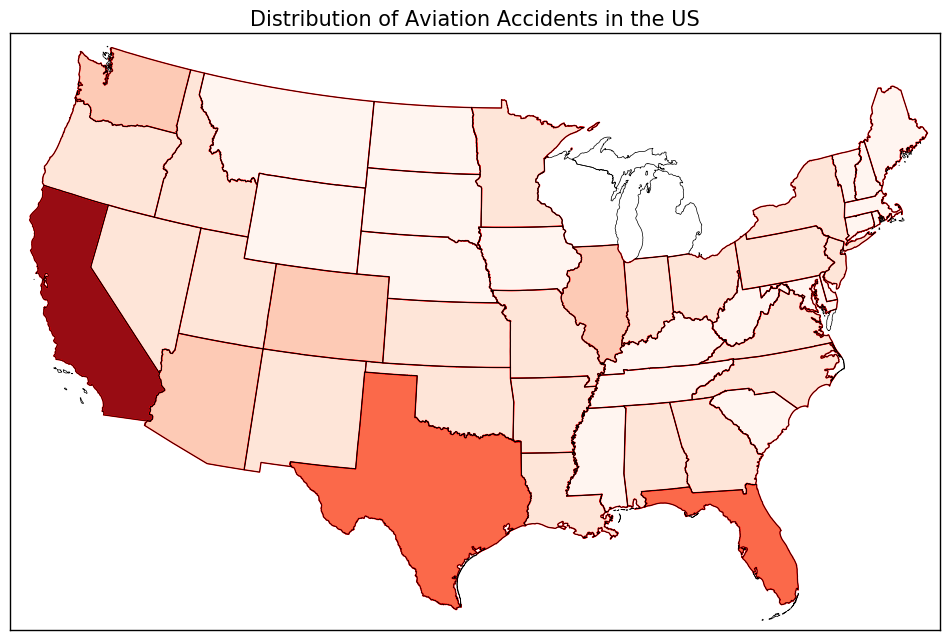

In [15]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

# assigning states into bins based on accidents and setting color scheme
num_colors = 10
cm = plt.get_cmap("Reds")
color_scheme = [cm(i/num_colors) for i in range(num_colors)]
bins = np.linspace(min(values), max(values), num_colors)
bin_values = np.digitize(values,bins)-1

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
plt.figure(figsize=(12,8))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_objs = []
for shape_dict in map.states_info:
    state_objs.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon
for i, state in enumerate(state_full_names):
    seg = map.states[state_objs.index(state)]
    poly = Polygon(seg, facecolor=color_scheme[bin_values[i]],edgecolor='red')
    ax.add_patch(poly)

plt.title("Distribution of Aviation Accidents in the US", fontsize=15)
plt.show()